In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [2]:
class MyRandom:
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
        
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt( Npoints )* np.abs( np.mean( array**moment ) - 1/(1+moment) )

In [3]:
rand = MyRandom(seed = 12, method='drand48')

In [4]:
rand.Random()

0.0010749760087058746

In [5]:
def FillPoints(seed_, method_, Npoints):
    
    rand = MyRandom(seed = seed_, method=method_)
    
    points = np.zeros(Npoints)
    
    for i in tqdm(range( Npoints )):
        points[i] = rand.Random()
        
    return points

In [6]:
Npoints = 5000
NSimple = FillPoints( 64, 'simple', Npoints)
Ndrand48 = FillPoints( 56, 'drand48', Npoints)

100%|███████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 364329.24it/s]


In [7]:
indices = np.arange(Npoints)
Even = (indices%2) == 0
Even

array([ True, False,  True, ..., False,  True, False])

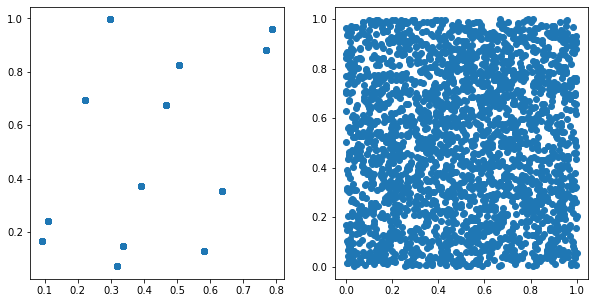

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

ax.scatter( NSimple[Even], NSimple[~Even] )
ax1.scatter( Ndrand48[Even], Ndrand48[~Even] )

In [9]:
rand1 = MyRandom(seed = 12, method='simple')
rand2 = MyRandom(seed = 12, method='drand48')

In [10]:
Points = np.logspace(2,6,5)
Points

array([1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [11]:
NMoments = 10

Moments1 = []
Moments2 = []

for k in tqdm(range(NMoments)):
    
    test1 = []
    test2 = []
    
    for i in range(len(Points)):
        test1.append( rand1.TestMethod( int(Points[i]),k+1, 16, 'simple' ) )
        test2.append( rand2.TestMethod( int(Points[i]),k+1, 16, 'drand48' ) )
        
    Moments1.append(test1)
    Moments2.append(test2)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:26<00:00,  2.62s/it]


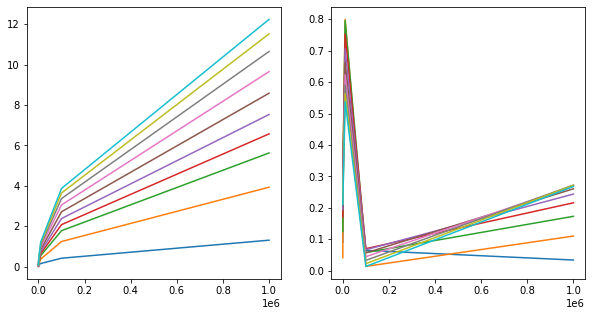

In [13]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for i in range(NMoments):
    ax1.plot( Points, Moments1[i], label='simple' )
    ax2.plot( Points, Moments2[i], label='drand48' )

In [20]:
lista = np.random.rand(1000)
Npoints = 1000
moment = 100
test = np.sqrt( Npoints )* np.abs( np.mean( lista**moment ) - 1/(1+moment) )

print(test)

0.024195849787742894


$$ \int_{0 }^{\pi/2} xsin(x) dx  $$

In [21]:
def f(x):
    return x*np.sin(x)

In [36]:
def MCIntegral( N = 100, a=0,b=0.5*np.pi ):
    
    x = np.random.uniform(a,b,size=int(N))
    y = f(x)
      
    return np.mean( y )*(b-a)

In [37]:
MCIntegral(N=10000000)

0.9998520703527299

In [43]:
Points = np.logspace(2,6,15)

Integral = np.zeros(len(Points))

for i in range(len(Points)):
    Integral[i] = MCIntegral(Points[i])

In [44]:
Integral

array([0.9456899 , 0.99405692, 1.01346722, 1.02808621, 0.969526  ,
       0.99389866, 1.00829178, 0.99634764, 0.99580719, 0.99617392,
       0.99628675, 1.00093328, 1.00186205, 0.99954182, 0.9999839 ])

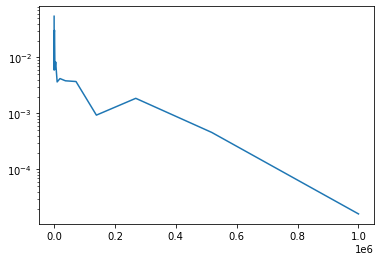

In [45]:
plt.plot(Points,np.abs(Integral-1))
plt.yscale('log')